In [ ]:
pip install ucimlrepo

DATA COLLECTION

In [ ]:
# Data handling
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Mathematical operations and warnings
import math
import warnings

# Data preprocessing and model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier

# Evaluation metrics and performance visualization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay

# Import the function to load datasets from the UCI Machine Learning Repository
from ucimlrepo import fetch_ucirepo



In [ ]:
# Retrieve the Breast Cancer Coimbra dataset using its unique ID from the repository
breast_cancer_coimbra = fetch_ucirepo(id=451)

# Separate the features (independent variables) and the target (dependent variable)
X = breast_cancer_coimbra.data.features
y = breast_cancer_coimbra.data.targets

# Add the target variable 'Classification' to the features DataFrame
X["Classification"] = y

# Export the final dataset to a CSV file for future use or analysis
X.to_csv("dataR2.csv", index=False)

In [ ]:
# Read the dataset from the saved CSV file into a DataFrame
df = pd.read_csv("dataR2.csv")

# Display the top rows of the DataFrame to get an overview of the data
print("Preview of the dataset:")
print(df.head())

Preview of the dataset:
   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  


In [ ]:
# Display the number of rows and columns in the dataset
print("\nDataset dimensions:")
print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")


Dataset dimensions:
Total Rows: 116, Total Columns: 10


In [ ]:
# Generate and display summary statistics for all numeric columns
print("\nStatistical summary of the dataset:")
print(df.describe())


Statistical summary of the dataset:
              Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

       Adiponectin    Resistin        MCP.1  Classification  
count   116.000000  116.000000   116.000000      116.000000  
mean     10.180874   14.725966   534.647000        1.551724  
std       6.843341   12.390646   345.912663    

In [ ]:
# Display the names of all columns along with their corresponding data types
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object


In [ ]:
# Check and display the number of missing (null) values in each column
print("\nNumber of missing values per column:")
print(df.isnull().sum())


Number of missing values per column:
Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64


In [ ]:
# Display the count of each class label in the target variable
print("\nDistribution of target classes:")
print(df['Classification'].value_counts())


Distribution of target classes:
Classification
2    64
1    52
Name: count, dtype: int64


DATA PREPROCSSING

In [ ]:
# Separate the input features from the target variable
X = df.drop("Classification", axis=1)   # Exclude the 'Classification' column
y = df["Classification"]                # Use 'Classification' as the target

# Fill missing values in the feature set using the mean of each column
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standardize the feature values to have a mean of 0 and standard deviation of 1
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

In [ ]:
# Split the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

EXPLORATORY DATA ANALYSIS

<Figure size 1200x600 with 0 Axes>

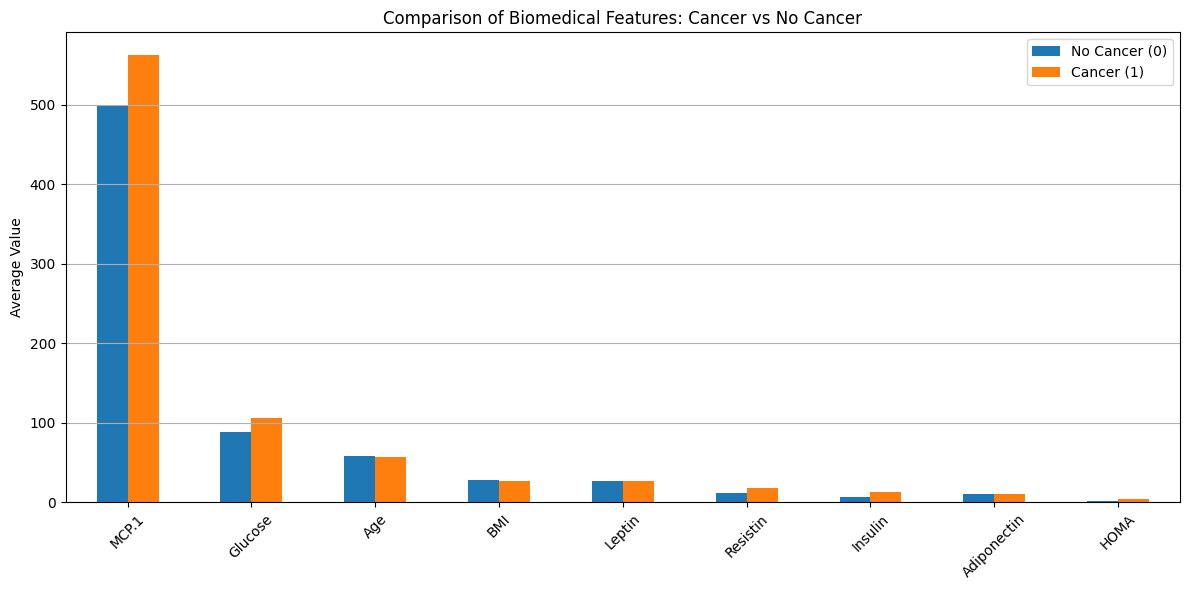

In [ ]:
# Calculate mean values of each feature grouped by the target class (0 or 1)
mean_values_by_class = df.groupby('Classification').mean()

# Reorganize the table so that features are rows and classes are columns
mean_comparison = mean_values_by_class.transpose()
mean_comparison.columns = ['No Cancer (0)', 'Cancer (1)']

# Sort the features based on their average values in the cancer group for better visualization
mean_comparison = mean_comparison.sort_values('Cancer (1)', ascending=False)

# Create a bar chart to display how the average of each feature differs between the two classes
plt.figure(figsize=(12, 6))
mean_comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Biomedical Features: Cancer vs No Cancer')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


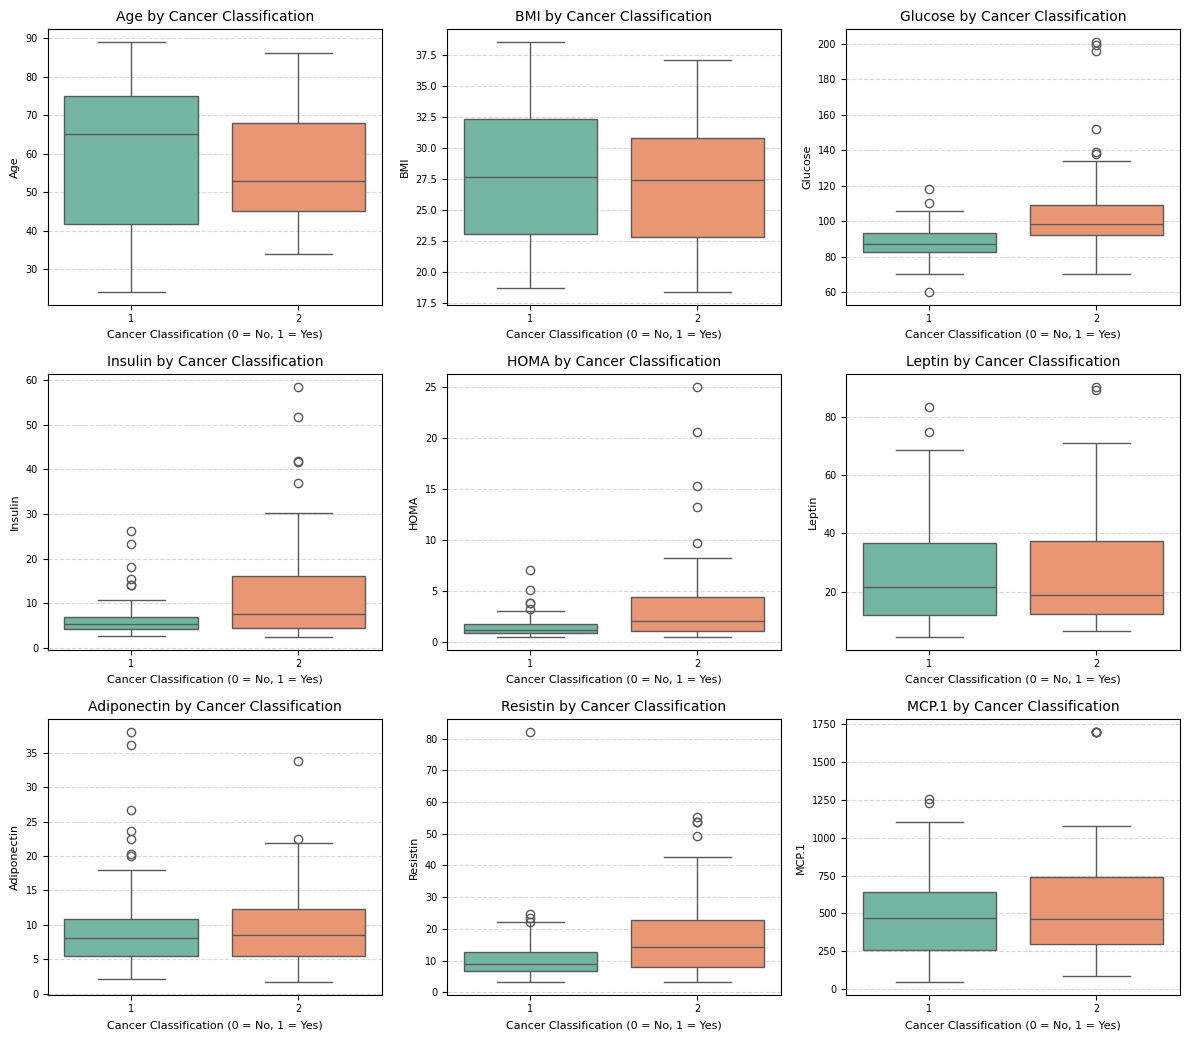

In [ ]:
# Suppress future-related warning messages for cleaner output
warnings.filterwarnings("ignore", category=FutureWarning)

# Select all feature columns by excluding the target column 'Classification'
feature_columns = df.columns[df.columns != 'Classification']
total_features = len(feature_columns)

# Compute the number of rows and columns for subplot grid to fit all features
cols = math.ceil(math.sqrt(total_features))
rows = math.ceil(total_features / cols)

# Create a grid of subplots based on the number of features
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3.5))
axes = axes.flatten()  # Convert the grid into a flat array for easy looping

# Loop through each feature and create a boxplot to compare its distribution across classes
for idx, feature in enumerate(feature_columns):
    sns.boxplot(
        x='Classification',       # Class label (0: No Cancer, 1: Cancer)
        y=feature,                # Feature to plot
        data=df,                  # Source data
        ax=axes[idx],             # Subplot to draw on
        palette='Set2',           # Color palette
        linewidth=1               # Border width of boxes
    )
    axes[idx].set_title(f'{feature} by Cancer Classification', fontsize=10)
    axes[idx].set_xlabel("Cancer Classification (0 = No, 1 = Yes)", fontsize=8)
    axes[idx].set_ylabel(feature, fontsize=8)
    axes[idx].tick_params(labelsize=7)
    axes[idx].grid(True, axis='y', linestyle='--', alpha=0.5)  # Add horizontal grid lines

# If there are extra subplots not used, remove them from the figure
for k in range(total_features, len(axes)):
    fig.delaxes(axes[k])

# Adjust layout to avoid overlap and display the plots
plt.tight_layout()
plt.show()


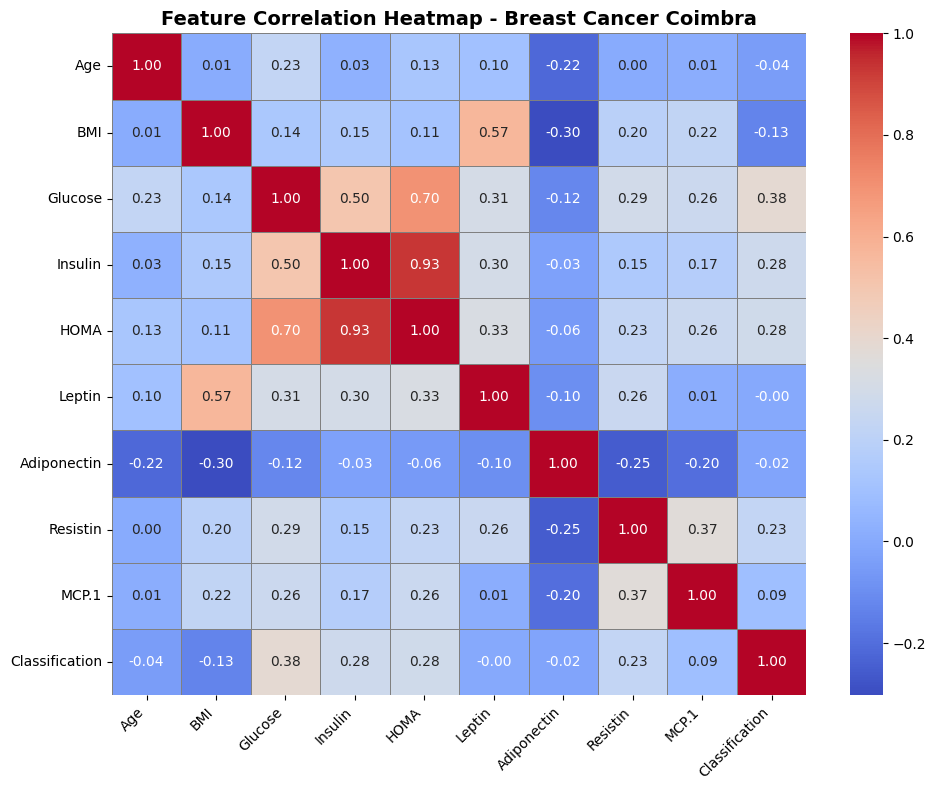

In [ ]:
# Read the dataset from the CSV file into a DataFrame
data = pd.read_csv("dataR2.csv")

# Compute the correlation matrix to understand the relationships between numerical features
corr_matrix = data.corr()

# Create a new figure for the heatmap and define its dimensions
plt.figure(figsize=(10, 8))

# Plot the correlation heatmap with annotations and styling
sns.heatmap(
    corr_matrix,          # Correlation matrix to be visualized
    annot=True,           # Display correlation values inside the cells
    cmap='coolwarm',      # Set color gradient from cool to warm colors
    fmt=".2f",            # Format values to two decimal places
    linewidths=0.5,       # Add space between cells
    linecolor='gray'      # Set the color for the cell borders
)

# Add a bold title and improve label presentation
plt.title("Feature Correlation Heatmap - Breast Cancer Coimbra", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()                   # Automatically adjust layout to avoid label overlap
plt.show()                           # Display the heatmap


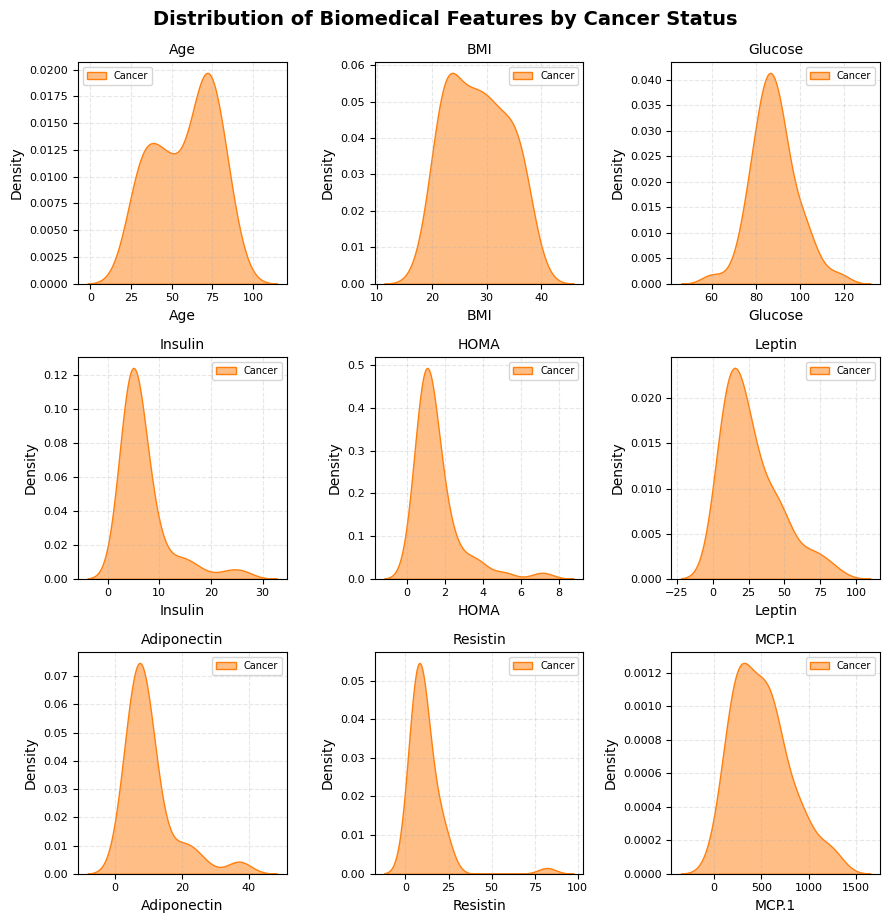

In [ ]:
# Select all columns except the target variable ('Classification') for feature analysis
feature_list = df.columns[df.columns != 'Classification']
num_features = len(feature_list)

# Determine the number of rows and columns needed for the grid of plots
columns = math.ceil(math.sqrt(num_features))
rows = math.ceil(num_features / columns)

# Create a multi-plot grid to display KDEs for each feature
fig, axes = plt.subplots(rows, columns, figsize=(columns * 3, rows * 3))
axes = axes.flatten()  # Flatten the 2D grid to a 1D array for easy indexing

# Plot kernel density curves for each feature, split by cancer classification
for idx, feature in enumerate(feature_list):
    sns.kdeplot(
        data=df[df['Classification'] == 0][feature],  # KDE for class 0 (No Cancer)
        fill=True,
        label='No Cancer',
        ax=axes[idx],
        alpha=0.5,
        linewidth=1
    )
    sns.kdeplot(
        data=df[df['Classification'] == 1][feature],  # KDE for class 1 (Cancer)
        fill=True,
        label='Cancer',
        ax=axes[idx],
        alpha=0.5,
        linewidth=1
    )
    axes[idx].set_title(feature, fontsize=10)  # Title for each subplot
    axes[idx].tick_params(labelsize=8)         # Adjust tick label size
    axes[idx].legend(fontsize=7)               # Legend for class labels
    axes[idx].grid(True, linestyle='--', alpha=0.3)  # Add light gridlines

# Remove any unused plots from the grid to avoid blank spaces
for k in range(num_features, len(axes)):
    fig.delaxes(axes[k])

# Automatically adjust spacing and add an overall title above all subplots
plt.tight_layout()
plt.suptitle("Distribution of Biomedical Features by Cancer Status", fontsize=14, fontweight='bold', y=1.02)
plt.show()


MODEL EVALUATION

In [ ]:
# Create a dictionary of different classification algorithms to evaluate
models = {
    "Logistic Regression": LogisticRegression(),  # Linear model for binary classification
    "Decision Tree": DecisionTreeClassifier(random_state=42),  # Tree-based model
    "Gaussian Naive Bayes": GaussianNB(),  # Probabilistic model based on Bayes' theorem
    "KNN": KNeighborsClassifier(),  # Instance-based learning using nearest neighbors
    "Bagging with Decision Tree": BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=50,
        random_state=42
    ),  # Ensemble method using bagging
    "AdaBoost": AdaBoostClassifier(
        n_estimators=50,
        random_state=42
    ),  # Boosting technique to combine weak learners
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42
    )  # Ensemble of decision trees using bagging and feature randomness
}

In [ ]:
# Initialize an empty list to collect performance metrics for each model
results = []

# Loop through each model, train it, make predictions, and evaluate performance
for name, model in models.items():
    model.fit(X_train, y_train)                  # Train the model using the training data
    y_pred = model.predict(X_test)               # Predict outcomes on the test set

    # Calculate evaluation metrics for the current model
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Save the model's evaluation metrics in the results list
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

    # Display the classification report and accuracy for the current model
    print(f"{name} - Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    print('-' * 50)  # Print a separator for better readability


Logistic Regression - Accuracy: 0.88
              precision    recall  f1-score   support

           1       0.85      0.92      0.88        12
           2       0.91      0.83      0.87        12

    accuracy                           0.88        24
   macro avg       0.88      0.88      0.87        24
weighted avg       0.88      0.88      0.87        24

--------------------------------------------------
Decision Tree - Accuracy: 0.75
              precision    recall  f1-score   support

           1       0.80      0.67      0.73        12
           2       0.71      0.83      0.77        12

    accuracy                           0.75        24
   macro avg       0.76      0.75      0.75        24
weighted avg       0.76      0.75      0.75        24

--------------------------------------------------
Gaussian Naive Bayes - Accuracy: 0.75
              precision    recall  f1-score   support

           1       0.69      0.92      0.79        12
           2       0.88      

RESULTS

In [ ]:
# Create a DataFrame from the list of evaluation results for all models
results_df = pd.DataFrame(results)

# Display the performance metrics for each classification model
print(results_df)

                        Model  Accuracy  Precision    Recall  F1-Score
0         Logistic Regression  0.875000   0.846154  0.916667  0.880000
1               Decision Tree  0.750000   0.800000  0.666667  0.727273
2        Gaussian Naive Bayes  0.750000   0.687500  0.916667  0.785714
3                         KNN  0.833333   0.785714  0.916667  0.846154
4  Bagging with Decision Tree  0.833333   0.833333  0.833333  0.833333
5                    AdaBoost  0.791667   0.733333  0.916667  0.814815
6               Random Forest  0.791667   0.818182  0.750000  0.782609


In [ ]:
# Identify the model with the highest F1-Score from the results DataFrame
best_model_row = results_df.loc[results_df['F1-Score'].idxmax()]
best_model_name = best_model_row['Model']
best_f1_score = best_model_row['F1-Score']

# Display the name and F1-Score of the top-performing model
print(f"\nThe best model is: *{best_model_name}* with an F1-Score of {best_f1_score:.4f}")


The best model is: *Logistic Regression* with an F1-Score of 0.8800


In [ ]:
# Retrieve the top-performing model using its name and train it on the training data
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# Generate predictions on the test set using the trained best model
y_pred = best_model.predict(X_test)

VISUALIZATION

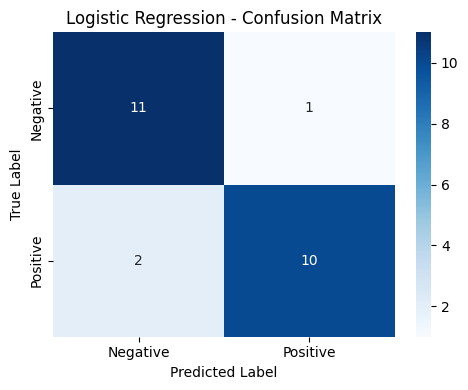

In [ ]:
# Compute the confusion matrix using actual and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Set the figure size for the heatmap
plt.figure(figsize=(5, 4))

# Create a heatmap to visualize the confusion matrix
sns.heatmap(
    cm,                      # Confusion matrix data
    annot=True,              # Show values inside the boxes
    fmt="d",                 # Display values as integers
    cmap="Blues",            # Use blue color tones
    xticklabels=["Negative", "Positive"],  # Labels for predicted classes
    yticklabels=["Negative", "Positive"]   # Labels for actual classes
)

# Add a title and axis labels for context
plt.title(f"{best_model_name} - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Optimize layout to prevent overlapping elements
plt.tight_layout()

# Display the heatmap
plt.show()


<Figure size 500x400 with 0 Axes>

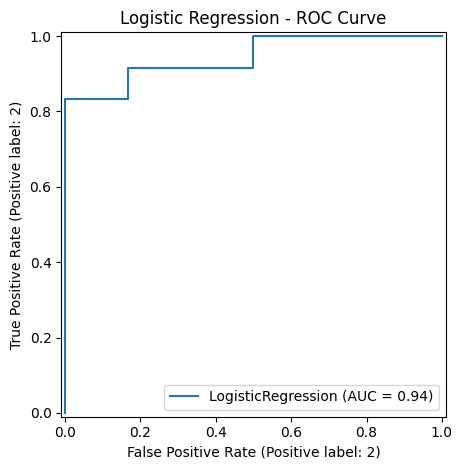

In [ ]:
# Create a new figure for the ROC curve
plt.figure(figsize=(5, 4))

# Generate the ROC curve using the best-performing model and test data
RocCurveDisplay.from_estimator(best_model, X_test, y_test)

# Set a title for the plot to indicate which model is being evaluated
plt.title(f"{best_model_name} - ROC Curve")

# Adjust layout to ensure nothing overlaps
plt.tight_layout()

# Display the final ROC plot
plt.show()


<Figure size 500x400 with 0 Axes>

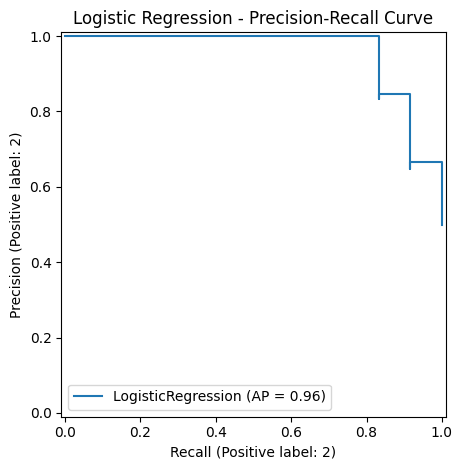

In [ ]:
# Initialize a new figure to plot the Precision-Recall curve
plt.figure(figsize=(5, 4))

# Draw the Precision-Recall curve using the selected model and test dataset
PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test)

# Add a title to indicate the model being visualized
plt.title(f"{best_model_name} - Precision-Recall Curve")

# Automatically adjust layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()

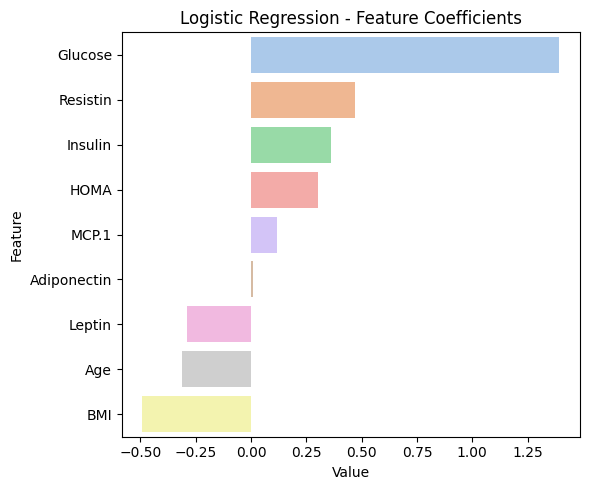

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(6, 5))

# Determine how to visualize feature influence based on the model type
if hasattr(best_model, "coef_"):
    # For models that provide coefficients (like Logistic Regression)
    coef_values = best_model.coef_[0]
    coef_df = pd.DataFrame({
        "Feature": X.columns,
        "Value": coef_values
    }).sort_values(by="Value", ascending=False)

    # Plot feature coefficients in descending order
    sns.barplot(x="Value", y="Feature", data=coef_df, palette="pastel")
    plt.title(f"{best_model_name} - Feature Coefficients")

elif hasattr(best_model, "feature_importances_"):
    # For models that provide feature importance scores (like Random Forest)
    importance_values = best_model.feature_importances_
    imp_df = pd.DataFrame({
        "Feature": X.columns,
        "Value": importance_values
    }).sort_values(by="Value", ascending=False)

    # Plot the feature importances in descending order
    sns.barplot(x="Value", y="Feature", data=imp_df, palette="pastel")
    plt.title(f"{best_model_name} - Feature Importances")

else:
    # Display a message if the model does not support feature interpretation
    print(f"Feature importance is not available for {best_model_name}")

# Adjust spacing to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()